# 异常和调试（Exceptions & Debug）
## 浙江理工大学 沈炜

## 异常
### 异常是指程序运行时碰到的错误，引发错误的原因有很多，例如除零、下标越界、文件不存在、网络异常、类型错误、名字错误、字典键错误、磁盘空间不足，等等。

In [1]:
# 几个异常的例子
A

NameError: name 'A' is not defined

In [2]:
10*(1/0)

ZeroDivisionError: division by zero

In [3]:
'2'+2

TypeError: can only concatenate str (not "int") to str

In [4]:
fp = open('123.data', 'rb')

FileNotFoundError: [Errno 2] No such file or directory: '123.data'

## 两种异常
### 一种是不可预知的，另一种是程序有意产生的。

## 异常处理
### 异常处理是指因为程序出错而在正常控制流以外采取检测和处理的行为。针对不可预知的异常的处理为了提高程序的鲁棒性（健壮性）；有意产生的异常是为了达到特定的目的。
### 处理流程
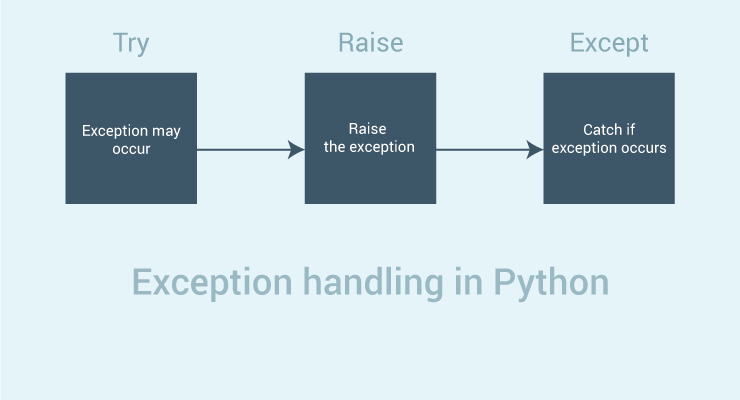

### 有意异常的一个场景（防止被跟踪）
#### 注意异常处理有一个隐含的跳转

### 异常处理的几种方式

In [ ]:
try:
    # 需要执行的操作
    line1   # 假定在这里出现异常
    line2
    line3
except Exception as e:
    # 可以依次排列多个异常处理
    # 一旦出现错误，即跳出 try except
    print(e)
else: # 如果没有异常，执行这里的代码
    

In [6]:
try:
    1/5
    #5/0
except Exception as e:
    print('error!')    # 只是跳过异常，并未检测是什么类型的异常
else:
    print('no error!')


no error!


In [8]:
while True:  # 另一个例子
    x = input('Please input:')
    try:
        x = int(x)
        print('You have input {0}'.format(x))
        break
    except Exception as e:
        print('Error.',e)

Please input: abc


Error. invalid literal for int() with base 10: 'abc'


Please input: fff


Error. invalid literal for int() with base 10: 'fff'


Please input: 5.222a


Error. invalid literal for int() with base 10: '5.222a'


Please input: 1e5


Error. invalid literal for int() with base 10: '1e5'


Please input: 8


You have input 8


In [ ]:
try:
    # 需要执行的操作
finally:
    # 一定要执行的代码

In [13]:
# 一个例子
file = open('file_path.txt', 'w')
try:
    file.write("I'm the best programmmer!")
    1/0
except Exception as e:
    print(e)
finally:
    file.close()   # 保证文件一定被关闭
    print('process error')


division by zero
process error


In [14]:
!type file_path.txt

I'm the best programmmer!


## 异常类
### 下面是常见的异常类
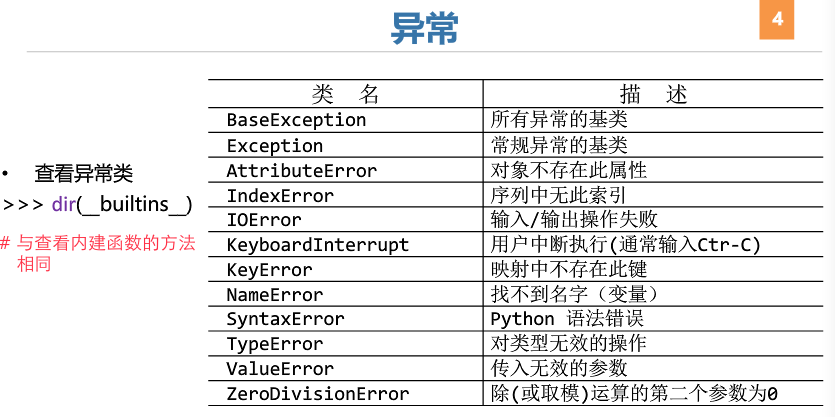

In [17]:
# IndexError类处理的一个例子
a_list = ['China', 'America', 'England', 'France']
while True:
    n = input('请输入字符串的序号')
    try:
        n = int(n)
        print(a_list[n])
    except Exception as e:
	    print('列表元素的下标越界，请重新输入字符串的序号',e)
    else:
	    break

请输入字符串的序号 5


列表元素的下标越界，请重新输入字符串的序号 list index out of range


请输入字符串的序号 4


列表元素的下标越界，请重新输入字符串的序号 list index out of range


请输入字符串的序号 3


France


In [18]:
# IOError的处理
import sys
for arg in sys.argv[1:]:
    try:
        print(arg)
        f = open(arg, 'r')
    except IOError:
        print('cannot open', arg)
    else:
        print(arg, 'has', len(f.readlines()), 'lines')
        f.close()

-f
cannot open -f
C:\Users\latitude\AppData\Roaming\jupyter\runtime\kernel-11f47ff4-79c2-4de6-b7ac-312c08c06214.json
C:\Users\latitude\AppData\Roaming\jupyter\runtime\kernel-11f47ff4-79c2-4de6-b7ac-312c08c06214.json has 12 lines


In [22]:
# 多层处理
try:
    x=input('请输入被除数: ')
    y=input('请输入除数: ')
    z=float(x) / float(y)
except ZeroDivisionError:
    print('除数不能为零')
except TypeError:
    print('被除数和除数应为数值类型')
except NameError:
    print('变量不存在')
except ValueError:
    print('输入的值不对')    # float()产生的异常
except BaseException:
    print('处理基类异常')
else:
    print(x, '/', y, '=', z)

请输入被除数:  5
请输入除数:  0


除数不能为零


In [23]:
# 较完整的例子
def div(x, y):
	try:
		y=float(y)
		print(x / y)
	except ZeroDivisionError:
		print('ZeroDivisionError')
	except ValueError:
		print('ValueError')
	except TypeError:
		print('TypeError')
	except NameError:
		print('NameError')
	else:
		print('No Error')
	finally:
		print("executing finally clause")

div('0','1')

TypeError
executing finally clause


## 自定义异常

In [29]:
a=-2
try:
    if a<0:
        raise ValueError("a can't be lower than 0")
        #raise IOError("this is a io error")
except IOError as e:
    print(e)
except ValueError as e:
    print(e)

a can't be lower than 0


In [33]:
class MyError(Exception):    # 自定义异常类
    def __init__(self,n):  
        self.n=n

try:
    n=input("请输入数字：")
    if not n.isdigit():
        raise MyError(n)
except MyError as e:
    print("MyError：请输入数字。\n您输入的是：",e.n)
else:
    print("未发生异常")

请输入数字： abc


MyError：请输入数字。
您输入的是： abc


## 断言（Assert）
### 对代码运行中的结果进行事先判断，不满足时，抛出异常，方便调试。
### 仅在<font color=red>\__debug__</font>为<font color=red>True</font>有效。

In [34]:
a=0
assert a>0
# if not condition:
#    raise AssertionError()

AssertionError: 

In [36]:
assert True
assert False

AssertionError: 

In [39]:
a=input('input a')
a=int(a)
try:
    assert a>0, 'a must be larger than 0'
except AssertionError as e:
    print('assertion error', e)


input a -1


assertion error a must be larger than 0


## 上下文管理
### <font color=red>with</font>语句：with语句结束时，<font color=red>还原with语句执行时的现场</font>，无论是否发生异常

In [42]:
# with context_expr [as var]
#     with 块
with open('aaa.txt','w') as f:
    f.write('I love python best     !!!!')
    1/0

ZeroDivisionError: division by zero

In [43]:
!type aaa.txt

I love python best     !!!!


In [44]:
f=open('bbb.txt','w')
f.write('I love python???')
1/0
f.close()

ZeroDivisionError: division by zero

In [45]:
!type bbb.txt